In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
#added this to code - i think we needed it based on previous examples
coordinates = list(lat_lngs)
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [5]:
import requests
requests.__version__

'2.28.1'

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a49bc9fe97f3dd896f8e5934f600ab9a


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a49bc9fe97f3dd896f8e5934f600ab9a&q=Boston


In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 46.89,
  'feels_like': 40.98,
  'temp_min': 42.39,
  'temp_max': 50.79,
  'pressure': 1010,
  'humidity': 94},
 'visibility': 6437,
 'wind': {'speed': 13.8, 'deg': 140},
 'rain': {'1h': 1.63},
 'clouds': {'all': 100},
 'dt': 1673582814,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1673525520,
  'sunset': 1673559149},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 46.89,
  'feels_like': 40.98,
  'temp_min': 42.39,
  'temp_max': 50.79,
  'pressure': 1010,
  'humidity': 94},
 'visibility': 6437,
 'wind': {'speed': 13.8, 'deg': 140},
 'rain': {'1h': 1.63},
 'clouds': {'all': 100},
 'dt': 1673582814,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1673525520,
  'sunset': 1673559149},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1673525520,
 'sunset': 1673559149}

In [19]:
boston_data["sys"]["country"]

'US'

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 50.79 94 100 13.8


In [21]:
boston_data["dt"]

1673582814

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2023, 1, 13, 4, 6, 54)

In [23]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2023-01-13 04:06:54'

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | brokopondo
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | rosetown
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | novyye burasy
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | sukumo
Processing Record 16 of Set 1 | balagansk
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | half moon bay
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 

Processing Record 38 of Set 4 | vestmannaeyjar
Processing Record 39 of Set 4 | san jeronimo
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | leo
Processing Record 42 of Set 4 | horodyshche
Processing Record 43 of Set 4 | leninsk
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | belousovka
Processing Record 46 of Set 4 | shihezi
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | ayagoz
Processing Record 49 of Set 4 | alice springs
Processing Record 50 of Set 4 | guiratinga
Processing Record 1 of Set 5 | tyumentsevo
Processing Record 2 of Set 5 | warri
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | talcahuano
Processing Record 7 of Set 5 | christchurch
Processing Record 8 of Set 5 | santa rosa
Processing Record 9 of Set 5 | havoysund
Processing Re

Processing Record 27 of Set 8 | balimo
City not found. Skipping...
Processing Record 28 of Set 8 | umm kaddadah
Processing Record 29 of Set 8 | bilibino
Processing Record 30 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 31 of Set 8 | talara
Processing Record 32 of Set 8 | lakatoro
Processing Record 33 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | meadow lake
Processing Record 36 of Set 8 | ayia galini
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | mapiri
Processing Record 39 of Set 8 | cayenne
Processing Record 40 of Set 8 | andenes
Processing Record 41 of Set 8 | port macquarie
Processing Record 42 of Set 8 | trairi
Processing Record 43 of Set 8 | conceicao da barra
Processing Record 44 of Set 8 | koungheul
Processing Record 45 of Set 8 | mandalgovi
Processing Record 46 of Set 8 | ishinomaki
Processing Record 47 of Set 8 | puerto escondido
Processing Rec

Processing Record 12 of Set 12 | sokoto
Processing Record 13 of Set 12 | price
Processing Record 14 of Set 12 | inuvik
Processing Record 15 of Set 12 | dakar
Processing Record 16 of Set 12 | fortuna
Processing Record 17 of Set 12 | waingapu
Processing Record 18 of Set 12 | razgrad
Processing Record 19 of Set 12 | tingo maria
Processing Record 20 of Set 12 | ambilobe
Processing Record 21 of Set 12 | arona
Processing Record 22 of Set 12 | asosa
Processing Record 23 of Set 12 | biu
Processing Record 24 of Set 12 | grand gaube
Processing Record 25 of Set 12 | juifang
City not found. Skipping...
Processing Record 26 of Set 12 | aginskoye
Processing Record 27 of Set 12 | chulym
Processing Record 28 of Set 12 | mount gambier
Processing Record 29 of Set 12 | hamilton
Processing Record 30 of Set 12 | odesskoye
Processing Record 31 of Set 12 | yarada
Processing Record 32 of Set 12 | houma
Processing Record 33 of Set 12 | yerbogachen
Processing Record 34 of Set 12 | kahului
Processing Record 35 o

In [10]:
len(cities)

634

In [11]:
len(city_data)

585

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,64.81,51,69,7.29,NZ,2023-01-13 05:54:42
1,College,64.8569,-147.8028,-8.93,84,20,0.00,US,2023-01-13 05:54:42
2,Constitucion,-35.3333,-72.4167,57.15,70,6,6.87,CL,2023-01-13 05:54:43
3,Busselton,-33.6500,115.3333,80.08,47,1,17.11,AU,2023-01-13 05:50:16
4,Klaksvik,62.2266,-6.5890,34.72,83,100,27.67,FO,2023-01-13 05:54:43
5,New Norfolk,-42.7826,147.0587,78.71,52,26,5.75,AU,2023-01-13 05:54:43
6,Brokopondo,4.7500,-55.1667,73.67,92,99,7.25,SR,2023-01-13 05:54:44
7,Ahipara,-35.1667,173.1667,67.30,90,39,7.92,NZ,2023-01-13 05:54:44
8,Barrow,71.2906,-156.7887,-0.38,71,100,33.38,US,2023-01-13 05:52:28
9,Atuona,-9.8000,-139.0333,78.46,74,12,13.33,PF,2023-01-13 05:54:44


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2023-01-13 05:54:42,-46.1927,168.8643,64.81,51,69,7.29
1,College,US,2023-01-13 05:54:42,64.8569,-147.8028,-8.93,84,20,0.00
2,Constitucion,CL,2023-01-13 05:54:43,-35.3333,-72.4167,57.15,70,6,6.87
3,Busselton,AU,2023-01-13 05:50:16,-33.6500,115.3333,80.08,47,1,17.11
4,Klaksvik,FO,2023-01-13 05:54:43,62.2266,-6.5890,34.72,83,100,27.67
5,New Norfolk,AU,2023-01-13 05:54:43,-42.7826,147.0587,78.71,52,26,5.75
6,Brokopondo,SR,2023-01-13 05:54:44,4.7500,-55.1667,73.67,92,99,7.25
7,Ahipara,NZ,2023-01-13 05:54:44,-35.1667,173.1667,67.30,90,39,7.92
8,Barrow,US,2023-01-13 05:52:28,71.2906,-156.7887,-0.38,71,100,33.38
9,Atuona,PF,2023-01-13 05:54:44,-9.8000,-139.0333,78.46,74,12,13.33


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1673638555.7819157

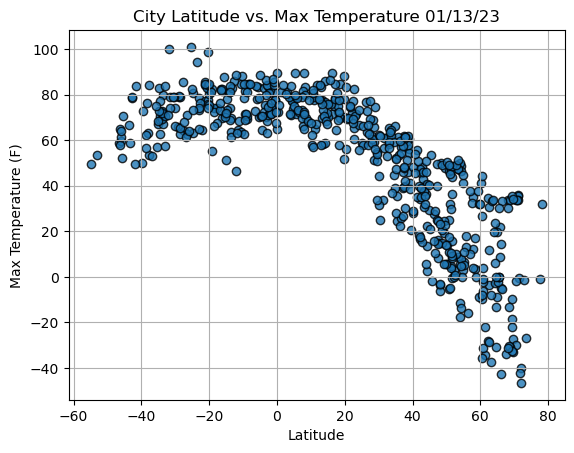

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

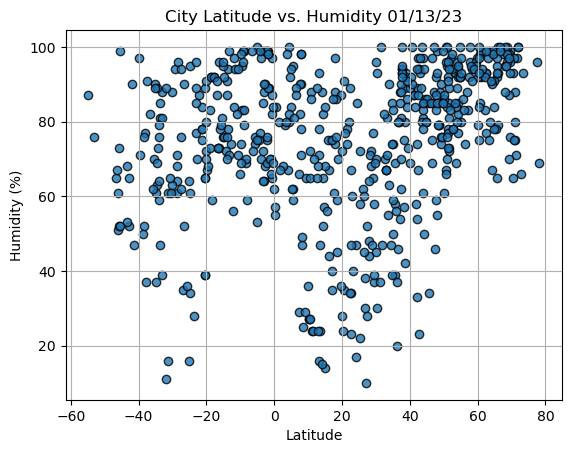

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

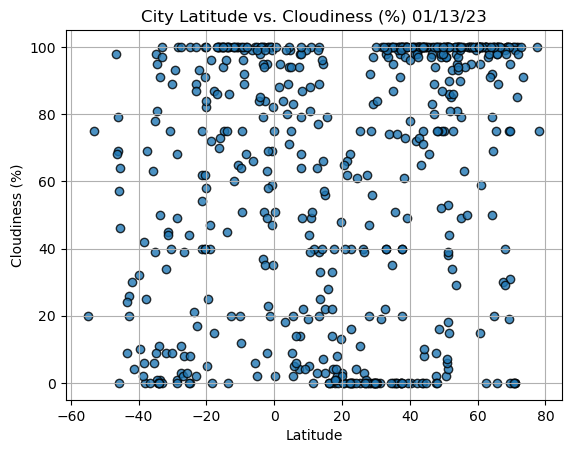

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

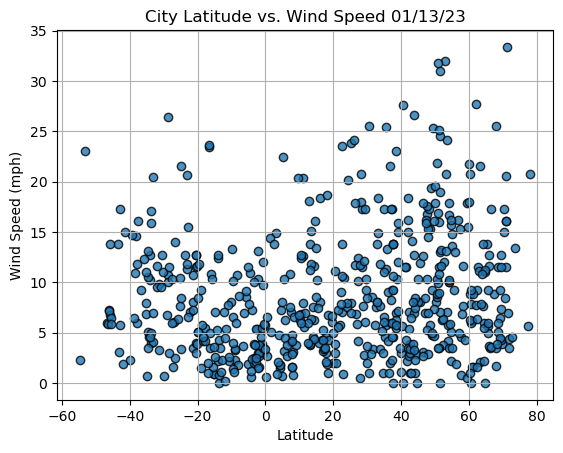

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()